In [13]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from gtfs_merida import GTFSMerida
from calcula_indicadores import get_correlacion_gtfs
datos = "../datos"
gtfs_file = f"{datos}/GTFS/gtfs-merida.zip"
zonas_path = f"{datos}/od_celular/zonificacion.gpkg"
od_path = f"{datos}/od_celular/Matriz_OD_Movilidad_Merida.csv"
gtfs = GTFSMerida(gtfs_file)

correlaciones_hora = get_correlacion_gtfs(gtfs, zonas_path, od_path)
correlaciones_hora.head()

Número de paradas 4139
Número de viajes 908524


,correlacion,hora
0,0.136764,0
1,0.189866,1
2,0.225665,2
3,0.487374,3
4,0.319439,4


<Axes: title={'center': 'Correlación entre oferta y demanda por hora'}, xlabel='hora'>

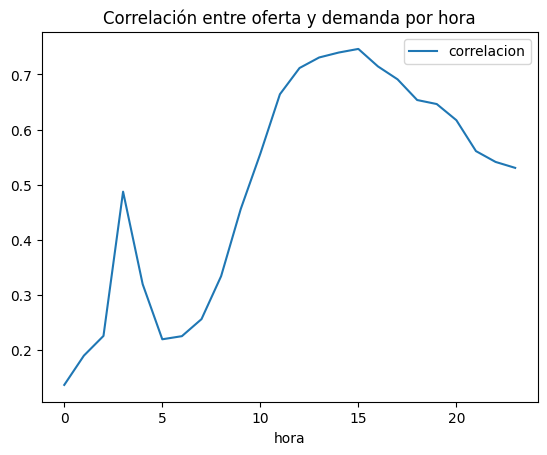

In [15]:
correlaciones_hora.plot(x="hora", y="correlacion", kind="line", title="Correlación entre oferta y demanda por hora")


In [16]:
datos = "../datos"
celular_path = f"{datos}/od_celular/zonificacion.gpkg"
# Mapa con zonas de celular
zonas_celular = gpd.read_file(celular_path)\
        .to_crs(epsg=4326)\
        .set_index("ID")\
        .rename(int)
zonas_celular.head()

,geometry
ID,
1,"MULTIPOLYGON (((-89.6477 21.04638, -89.6477 21..."
2,"MULTIPOLYGON (((-89.61764 21.00079, -89.61854 ..."
3,"MULTIPOLYGON (((-89.65784 20.90543, -89.6588 2..."
4,"MULTIPOLYGON (((-89.69829 21.02678, -89.69708 ..."
5,"MULTIPOLYGON (((-89.72558 20.98789, -89.7257 2..."


<Axes: >

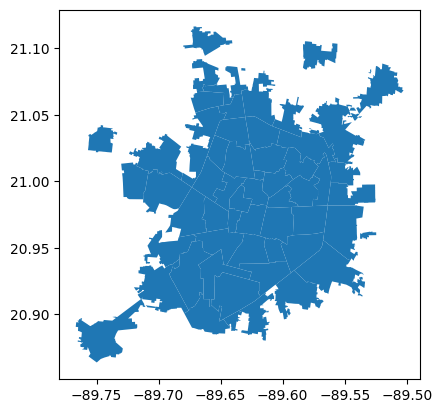

In [4]:
zonas_celular.plot()

In [17]:
# datos de origen destino
path_od = f"{datos}/od_celular/Matriz_OD_Movilidad_Merida.csv"
od_cel = pd.read_csv(path_od)
od_cel["hora"] = od_cel.origin_period.str[1:].astype(int)
od_cel.head()

,origin_period,origin_zone,destination_zone,origin_purpose,destination_purpose,distance,home_zone,income,age,sex,trips,hora
0,P14,12,1,non-HB,non-HB,D02_[2000-5000),7,I03_[17000-inf),A00_[0-30),female,2.213,14
1,P12,55,57,HB,non-HB,D03_[5000-10000),55,I03_[17000-inf),A02_[65-100),female,1.247,12
2,P08,5,5,non-HB,non-HB,D01_[1000-2000),4,I03_[17000-inf),A00_[0-30),female,5.746,8
3,P11,30,50,non-HB,HB,D02_[2000-5000),50,I03_[17000-inf),A00_[0-30),male,1.669,11
4,P08,41,41,non-HB,HB,D01_[1000-2000),41,I03_[17000-inf),A02_[65-100),female,5.416,8


In [18]:
# Matriz origen destino
od_cel.sort_values(["origin_zone", "destination_zone"])
matrix_od = pd.crosstab([od_cel["origin_zone"], od_cel["hora"]], od_cel["destination_zone"], values=od_cel["trips"], aggfunc="sum").fillna(0)
matrix_od.head()

destination_zone      1      2      3      4      5      6      7      8   \
origin_zone hora                                                            
1           0     10.788  1.294  0.000  2.745  8.458  1.079  7.626  0.928   
            1     11.439  0.000  0.000  4.910  4.864  0.000  3.345  0.000   
            2      5.280  0.000  0.000  2.966  4.420  0.000  0.000  2.244   
            3      4.196  1.294  0.327  1.018  0.000  0.000  0.423  0.000   
            4      3.947  0.810  1.791  4.051  0.000  0.000  0.899  0.000   

destination_zone      9      10  ...     48     49     50     51     52  \
origin_zone hora                 ...                                      
1           0     43.186  7.428  ...  5.424  2.360  5.466  3.188  4.582   
            1     24.078  5.910  ...  4.015  1.661  0.000  1.512  3.743   
            2     14.709  2.909  ...  0.913  1.784  0.000  3.348  2.785   
            3     12.426  3.340  ...  2.973  1.429  0.904  1.330  1.079   
            4      8.504  2.275  ...  0.950  0.000  0.332  2.667  4.336   

destination_zone     53      54     55      56     57  
origin_zone hora                                       
1           0     0.000  10.017  5.317  13.223  5.876  
            1     1.663   0.788  2.584   2.034  2.904  
            2     3.351   0.000  3.103   4.553  1.433  
            3     0.000   0.000  0.000   0.493  4.024  
            4     0.000   1.450  0.000   0.000  0.000  

[5 rows x 57 columns]

In [20]:

# calcular viajes de origen totales por hora y zona
viajes_origen_hora = matrix_od.sum(axis=1).unstack("hora").fillna(0)
viajes_origen_hora.to_pickle(f"{datos}/od_celular/viajes_origen_hora_zona.pkl")
viajes_origen_hora.head()


hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
origin_zone,,,,,,,,,,,,,,,,,,,,,
1,498.628,294.410,257.658,172.698,138.137,149.189,228.222,454.769,578.100,679.688,...,1425.947,1119.218,1114.479,992.737,974.755,985.772,942.688,885.686,708.641,439.761
2,119.344,68.206,74.495,55.306,57.439,48.532,79.937,145.265,210.614,222.486,...,528.090,408.119,335.169,281.488,293.885,284.170,288.571,241.576,200.165,115.859
3,504.056,329.758,248.776,221.989,232.768,348.848,499.079,685.337,692.428,812.104,...,1260.124,1176.870,1137.630,1084.807,1066.663,930.739,1029.218,960.799,918.709,587.681
4,1171.022,789.208,743.129,682.286,706.562,1036.550,1667.993,2322.072,2889.902,2646.888,...,2675.383,2453.634,2509.809,2429.017,2525.583,2366.823,2112.763,2047.092,2008.788,1233.179
5,1212.734,905.542,831.903,725.207,1150.793,1596.122,2691.984,3318.645,3370.668,2774.157,...,2397.887,2281.035,2270.297,2239.467,2313.392,1965.649,1827.308,1672.273,1630.324,1083.080


In [21]:
# calcular oferta de autobuses por hora
stoptimes = pd.read_csv(f"{datos}/rutas_merida_geo/stop_times_merida.csv")
stoptimes["hora"] = stoptimes.departure_time.str[:2].astype(int)
stoptimes.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,shape_dist_traveled,timepoint,hora
0,2124510,03:45:00,03:45:00,18284,1,0,0,3
1,2124510,03:45:00,03:45:00,16770,2,3,0,3
2,2124510,03:47:00,03:47:00,16748,3,730,0,3
3,2124510,03:48:00,03:48:00,16725,4,1200,0,3
4,2124510,03:49:00,03:49:00,16724,5,1675,0,3


In [22]:
# paradas
paradas = gpd.read_file(f"{datos}/rutas_merida_geo/paradas_merida.geojson")\
        .to_crs(epsg=4326)
paradas["stop_id"] = paradas["stop_id"].astype(int)
paradas.head(2)

,stop_id,stop_name,location_type,wheelchair_boarding,geometry
0,212,plaza grande,0,1,POINT (-89.62369 20.9665)
1,231,Fin de ruta,0,1,POINT (-89.6258 20.96787)


In [23]:
# añade zona a la que pertenece la parada
paradas_zona = gpd.sjoin(paradas, zonas_celular, predicate="intersects")\
        .rename(columns={"ID": "zona_id"})
paradas_zona.head()

,stop_id,stop_name,location_type,wheelchair_boarding,geometry,zona_id
0,212,plaza grande,0,1,POINT (-89.62369 20.9665),48
1,231,Fin de ruta,0,1,POINT (-89.6258 20.96787),48
2,232,Inicio de ruta,0,1,POINT (-89.62715 20.96697),48
3,233,Inicio de ruta,0,1,POINT (-89.6258 20.96787),48
4,234,Fin de ruta,0,1,POINT (-89.62715 20.96697),48


In [24]:
stoptimes_zona = pd.merge(stoptimes, paradas_zona[["stop_id", "zona_id"]], on="stop_id")
stoptimes_zona.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,shape_dist_traveled,timepoint,hora,zona_id
0,2124510,03:45:00,03:45:00,18284,1,0,0,3,48
1,2124510,03:45:00,03:45:00,16770,2,3,0,3,48
2,2124510,03:47:00,03:47:00,16748,3,730,0,3,48
3,2124510,03:48:00,03:48:00,16725,4,1200,0,3,48
4,2124510,03:49:00,03:49:00,16724,5,1675,0,3,48


In [26]:
oferta_zona_hora = stoptimes_zona.groupby(["zona_id", "hora"])["trip_id"].nunique().unstack("hora").fillna(0)
oferta_zona_hora.to_pickle(f"{datos}/od_celular/oferta_zona_hora.pkl")
oferta_zona_hora.head()

hora,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
zona_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,26.0,90.0,104.0,107.0,103.0,104.0,...,101.0,105.0,97.0,102.0,92.0,70.0,24.0,3.0,0.0,0.0
2,0.0,0.0,0.0,0.0,59.0,92.0,115.0,118.0,118.0,119.0,...,116.0,118.0,113.0,109.0,102.0,50.0,1.0,0.0,0.0,0.0
3,0.0,1.0,10.0,33.0,113.0,189.0,202.0,201.0,206.0,202.0,...,198.0,193.0,192.0,185.0,141.0,104.0,38.0,8.0,1.0,0.0
4,0.0,0.0,0.0,11.0,55.0,68.0,71.0,72.0,72.0,66.0,...,70.0,66.0,69.0,66.0,50.0,37.0,12.0,0.0,0.0,0.0
5,0.0,0.0,0.0,4.0,51.0,69.0,69.0,72.0,72.0,71.0,...,71.0,68.0,68.0,63.0,56.0,45.0,23.0,0.0,0.0,0.0


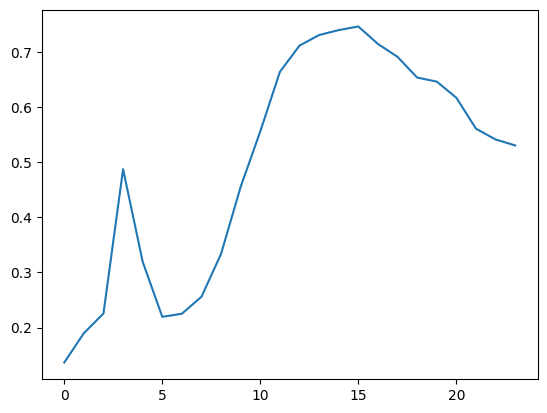

In [83]:
oferta_demanda = oferta_zona_hora.add_prefix("oferta_")\
    .join(viajes_origen_hora.add_prefix("demanda_"))
correlaciones_hora = np.diag(oferta_demanda.corr().filter(like="demanda_").values)
plt.plot(correlaciones_hora)

<Axes: title={'center': 'Viajes-zona por hora'}, xlabel='hora'>

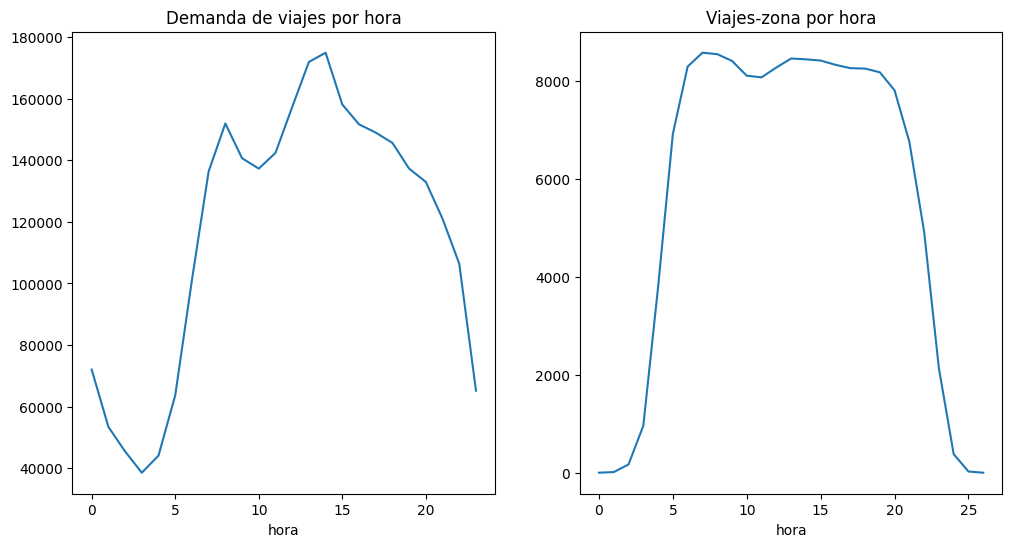

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
viajes_origen_hora.sum().plot(title="Demanda de viajes por hora", ax=ax1)
oferta_zona_hora.sum().plot(title="Viajes-zona por hora", ax=ax2)